# Những bộ phim có thời lượng dài (ví dụ > 2 tiếng) có xu hướng đạt điểm cao hơn phim ngắn không?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Đọc dữ liệu:

In [ ]:
try:
    df = pd.read_csv('IMDB_movies.csv')
    print("Đã tải dữ liệu thành công!")
except FileNotFoundError:
    print("Lỗi: Không tìm thấy file 'data_cleaned.csv'.")
    

Đã tải dữ liệu thành công!


2. Phân nhóm thời lượng (Feature Engineering)

In [ ]:
def classify_duration(minutes):
    if minutes < 90:
        return 'Ngắn (<90p)'
    elif minutes <= 120:
        return 'Trung bình (90-120p)'
    else:
        return 'Dài (>120p)'

df['run_time_group'] = df['run_time'].apply(classify_duration)

3. Trực quan hóa dữ liệu

In [ ]:
plt.figure(figsize=(25, 6))

<Figure size 2500x600 with 0 Axes>

<Figure size 2500x600 with 0 Axes>

3.1. Biểu đồ 1: Scatter Plot với đường hồi quy
     giúp trả lời: Thời lượng tăng thì điểm có tăng tuyến tính không?

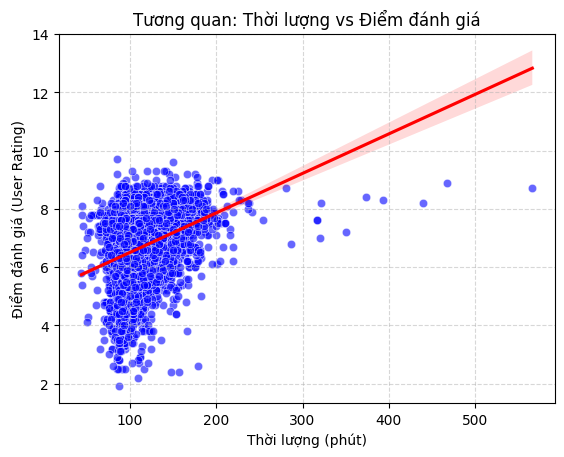

In [ ]:
#plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='run_time', y='rating', alpha=0.6, color='blue')
sns.regplot(data=df, x='run_time', y='rating', scatter=False, color='red')
plt.title('Tương quan: Thời lượng vs Điểm đánh giá')
plt.xlabel('Thời lượng (phút)')
plt.ylabel('Điểm đánh giá (User Rating)')
plt.grid(True, linestyle='--', alpha=0.5)

3.2. Biểu đồ 2: Box Plot theo nhóm
     giúp trả lời: Nhóm phim dài có thực sự "nhỉnh" hơn về điểm trung bình không?

C:\Users\asecr\AppData\Local\Temp\ipykernel_19080\97127919.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='run_time_group', y='rating', order=order_list, palette="Set2")


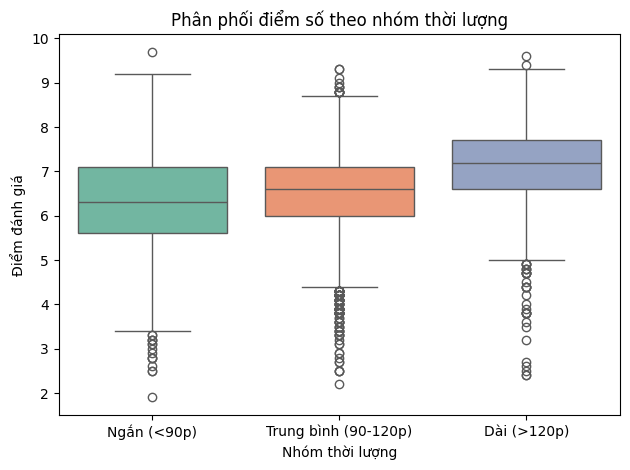

In [ ]:
#plt.subplot(1, 2, 2)
order_list = ['Ngắn (<90p)', 'Trung bình (90-120p)', 'Dài (>120p)']
sns.boxplot(data=df, x='run_time_group', y='rating', order=order_list, palette="Set2")
plt.title('Phân phối điểm số theo nhóm thời lượng')
plt.xlabel('Nhóm thời lượng')
plt.ylabel('Điểm đánh giá')

plt.tight_layout()
plt.savefig('duration_analysis_result.png')
plt.show()

4. Tính toán thống kê cụ thể

In [ ]:
print("\n--- Thống kê chi tiết ---")
# Hệ số tương quan
corr = df['run_time'].corr(df['rating'])
print(f"Hệ số tương quan Pearson: {corr:.2f}")
if corr > 0.3:
    print("=> Có sự tương quan dương: Phim dài hơn có xu hướng điểm cao hơn.")
elif corr < -0.3:
    print("=> Có sự tương quan âm: Phim dài hơn có xu hướng điểm thấp hơn.")
else:
    print("=> Tương quan yếu hoặc không rõ ràng.")

# Điểm trung bình từng nhóm
print("\nĐiểm trung bình theo nhóm:")
print(df.groupby('run_time_group')['rating'].mean().reindex(order_list))


--- Thống kê chi tiết ---
Hệ số tương quan Pearson: 0.33
=> Có sự tương quan dương: Phim dài hơn có xu hướng điểm cao hơn.

Điểm trung bình theo nhóm:
run_time_group
Ngắn (<90p)             6.245830
Trung bình (90-120p)    6.520782
Dài (>120p)             7.130469
Name: rating, dtype: float64
